<a href="https://colab.research.google.com/github/LilySaya/Fundamentals_of_AI/blob/main/MultivariateNDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import statistics as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [2]:
#Get data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names).assign(target = iris.target)

#Prepare parameters
x = df[['petal length (cm)','petal width (cm)']]
n_samples, n_features = x.shape
x = x.to_numpy()

y = df['target']
y = y.to_numpy()
y = y.reshape(-1,1)

#Train test split
X_train, X_test, y_train, y_test =  train_test_split(x,y, random_state = 0, test_size = 0.1)

In [3]:
#Splitting X_train into 3 groups according to 3 classes

new_X = []
for i in range(np.unique(y_train).shape[0]): #3 here
  new_X.append( [X_train[j,:] for j in range(X_train.shape[0]) if y_train[j] == float(i)] )

#np.array(np.array(new_X)[0]) Class 0 training data

In [4]:
class MultivariateNDist (object):
  def __init__ (self):
    self.u = None
    self.sig = None

  @staticmethod
  def redim(x):
    return x[...,np.newaxis] if x.ndim == 2 else x

  def fit(self,x):
    x = self.redim(x)
    self.u = x.mean(0)
    self.sig = np.einsum('ijk,ikj->jk',x-self.u, x-self.u)/(x.shape[0]-1)

  def prob(self,x):
    x = self.redim(x)
    f1 = (2*np.pi)**(-self.u.shape[0]/2)*np.linalg.det(self.sig)**(-1/2)
    f2 = np.exp((-1/2)*np.einsum('ijk,jl,ilk->ik',x-self.u,np.linalg.inv(self.sig),x-self.u))
    return f1*f2
print(X_train)

[[1.4 0.1]
 [4.5 1.5]
 [4.4 1.2]
 [1.4 0.3]
 [1.3 0.4]
 [4.9 2. ]
 [4.5 1.5]
 [1.9 0.2]
 [1.4 0.2]
 [4.8 1.8]
 [1.  0.2]
 [1.9 0.4]
 [4.3 1.3]
 [3.3 1. ]
 [1.6 0.4]
 [5.5 1.8]
 [4.5 1.5]
 [1.5 0.2]
 [4.9 1.8]
 [5.6 2.2]
 [3.9 1.4]
 [1.7 0.3]
 [5.1 1.6]
 [4.2 1.5]
 [4.  1.2]
 [5.5 2.1]
 [1.3 0.2]
 [5.1 2.3]
 [1.6 0.6]
 [1.5 0.2]
 [3.5 1. ]
 [5.5 1.8]
 [5.7 2.5]
 [5.  1.5]
 [5.8 1.8]
 [3.9 1.1]
 [6.1 2.3]
 [4.7 1.6]
 [3.8 1.1]
 [4.9 1.8]
 [5.1 1.5]
 [4.5 1.7]
 [5.  1.9]
 [4.7 1.4]
 [5.2 2. ]
 [4.5 1.6]
 [1.6 0.2]
 [5.1 1.9]
 [4.2 1.3]
 [3.6 1.3]
 [4.  1.3]
 [4.6 1.4]
 [6.  1.8]
 [1.5 0.2]
 [1.1 0.1]
 [5.3 1.9]
 [4.2 1.2]
 [1.7 0.2]
 [1.5 0.4]
 [4.9 1.5]
 [1.5 0.2]
 [5.1 1.8]
 [3.  1.1]
 [1.4 0.3]
 [4.5 1.5]
 [6.1 2.5]
 [4.2 1.3]
 [1.4 0.1]
 [5.9 2.1]
 [5.7 2.3]
 [5.8 2.2]
 [5.6 2.1]
 [1.6 0.2]
 [1.6 0.2]
 [5.1 2. ]
 [5.7 2.1]
 [1.3 0.3]
 [5.4 2.3]
 [1.4 0.2]
 [5.  2. ]
 [5.4 2.1]
 [1.3 0.2]
 [1.4 0.2]
 [5.8 1.6]
 [1.4 0.3]
 [1.3 0.2]
 [1.7 0.4]
 [4.  1.3]
 [5.9 2.3]
 [6.6 2.1]
 [1.4 0.2]

In [5]:
def predict(x):
  mod = MultivariateNDist()

  probs = []
  for i in range(np.unique(y_train).shape[0]):
    mod.fit(np.array(np.array(new_X)[i])) #Train class i data and use class i mean and covariance
    probs.append(  mod.prob(x)       ) #Calculate probabilities for class i
  probs = np.array(probs)
  probs = np.transpose(probs)
  #print(probs[0,i]) #i is the row number we want here

  #Decoder
  y_pred = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    result = np.amax(probs[0,i])

    for j in range(len(probs[0,i])):
      if probs[0,i][j] == result:
        y_pred[i] = j
  return y_pred

In [6]:
def colorlist(input):
    cols=[]
    for value in input:
        if value == 0:
            cols.append('red')
        elif value== 1:
            cols.append('blue')
        else:
            cols.append('green')
    return cols

<ipython-input-7-9b6042567c0b>:12: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[0].set_color('black')
<ipython-input-7-9b6042567c0b>:13: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[1].set_color('black')


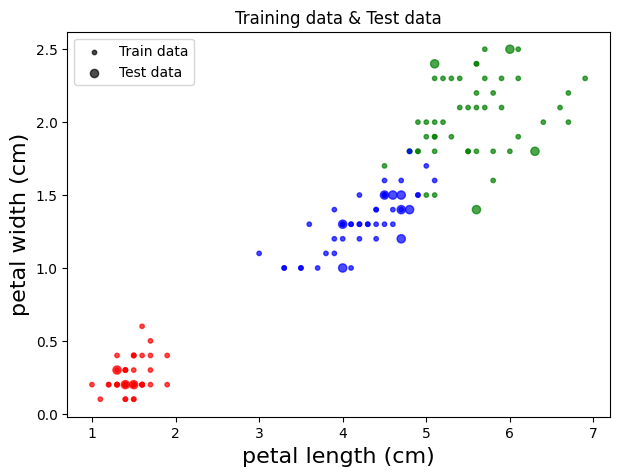

In [7]:
#Plot 1 for Training data & Test data
fig, ax = plt.subplots(figsize=(7,5))
train = ax.scatter(X_train[:,0], X_train[:,1], alpha = 0.7, s = 10, c = colorlist(y_train))
test = ax.scatter(X_test[:,0], X_test[:,1], alpha = 0.7, s = 35, c = colorlist(y_test))
plt.legend((train,test),("Train data","Test data"))
ax.set_title("Training data & Test data")
ax.set_xlabel("petal length (cm)", fontsize=16)
ax.set_ylabel("petal width (cm)", fontsize=16)

#Legend Handles
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')

<ipython-input-5-f96c1b158bde>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mod.fit(np.array(np.array(new_X)[i])) #Train class i data and use class i mean and covariance


Text(0, 0.5, 'petal width (cm)')

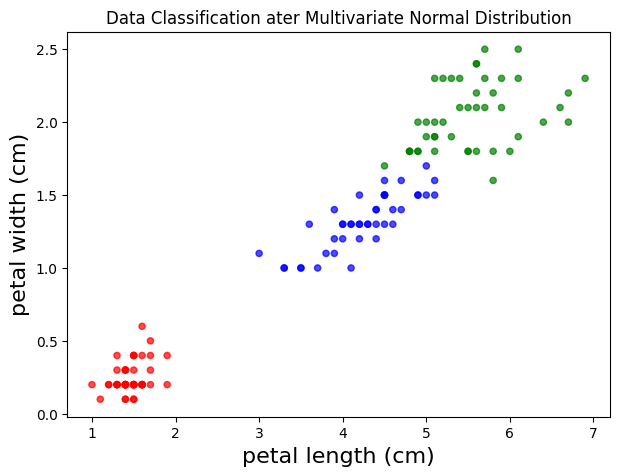

In [8]:
#Plot 2 for Data after MultivariateNormalDistribution
fig, ax = plt.subplots(figsize=(7,5))
train = ax.scatter(X_train[:,0], X_train[:,1], alpha = 0.7, s = 20, c = colorlist(predict(X_train)))
ax.set_title("Data Classification ater Multivariate Normal Distribution")
ax.set_xlabel("petal length (cm)", fontsize=16)
ax.set_ylabel("petal width (cm)", fontsize=16)

<ipython-input-5-f96c1b158bde>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mod.fit(np.array(np.array(new_X)[i])) #Train class i data and use class i mean and covariance


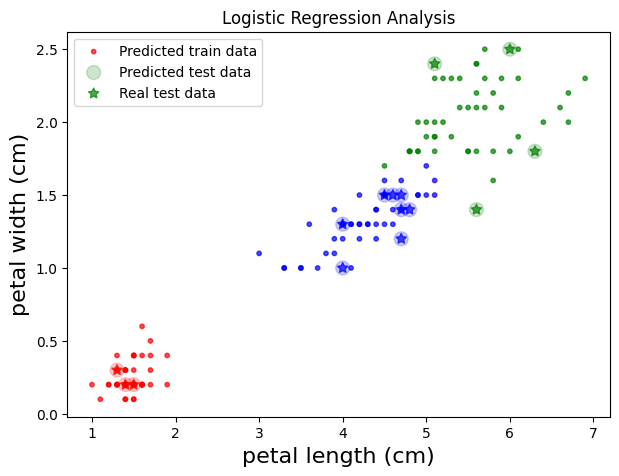

In [9]:
#Plot 3 for Analysis
fig, ax = plt.subplots(figsize=(7,5))
train = ax.scatter(X_train[:,0], X_train[:,1], alpha = 0.7, s = 10, c = colorlist(predict(X_train)))
test_result = ax.scatter(X_test[:,0], X_test[:,1], alpha = 0.2, s = 100, c = colorlist(predict(X_test)))
test_real = ax.scatter(X_test[:,0], X_test[:,1], alpha = 0.7, s = 60, marker = (5,1), c = colorlist(y_test))
ax.set_title("Logistic Regression Analysis")
ax.set_xlabel("petal length (cm)", fontsize=16)
ax.set_ylabel("petal width (cm)", fontsize=16)

plt.legend((train,test_result, test_real),("Predicted train data","Predicted test data","Real test data"))